In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df_netflix = pd.read_csv('https://github.com/Raquel1969/on35-python-s14-analise-de-dados/blob/main/exercicios/para-casa/dados_parte1/netflix.csv?raw=true')
df_netflix

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [9]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [10]:
df_netflix.isnull().sum()

,0
User ID,0
Subscription Type,0
Monthly Revenue,0
Join Date,0
Last Payment Date,0
Country,0
Age,0
Gender,0
Device,0
Plan Duration,0


##A quantidade de usuários utilizando tablet é 633

In [12]:
tablet_users_count = df_netflix[df_netflix['Device'] == 'Tablet'].shape[0]
print(f"Número de usuários que utilizam Tablet: {tablet_users_count}")

Número de usuários que utilizam Tablet: 633


In [16]:
dispositivos = df_netflix['Device'].value_counts()

In [20]:
total_usuarios = df_netflix.shape[0]

In [18]:
dispositivo_mais_utilizado = dispositivos.idxmax()

In [24]:
dispositivo_mais_utilizado_porcentagem = (dispositivos.max() / total_usuarios) * 100

##O dispositivo mais utilizado foi Laptop

In [25]:
print(f"O dispositivo mais utilizado é: {dispositivo_mais_utilizado} ({dispositivo_mais_utilizado_porcentagem:.2f}%)")


O dispositivo mais utilizado é: Laptop (25.44%)


##Gráfico dispositivo mais utilizado


In [31]:
intervalos = [0, 18, 30, 40, 50, 60, 100]
faixa_etaria = ['0-18', '19-30', '31-40', '41-50', '51-60', '60+']
df_netflix['Age Group'] = pd.cut(df_netflix['Age'], bins=intervalos, labels=faixa_etaria, include_lowest=True)
df_netflix['Age Group']

,Age Group
0,19-30
1,31-40
2,41-50
3,51-60
4,31-40
...,...
2495,19-30
2496,31-40
2497,31-40
2498,41-50


##Não houveram usuários 0-18 e nem 60+
##Laptop, e tablet são os mais usados

<ipython-input-59-92b4f73885ae>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dispositivos_por_idade = df_netflix.groupby('Age Group')['Device'].value_counts().unstack()


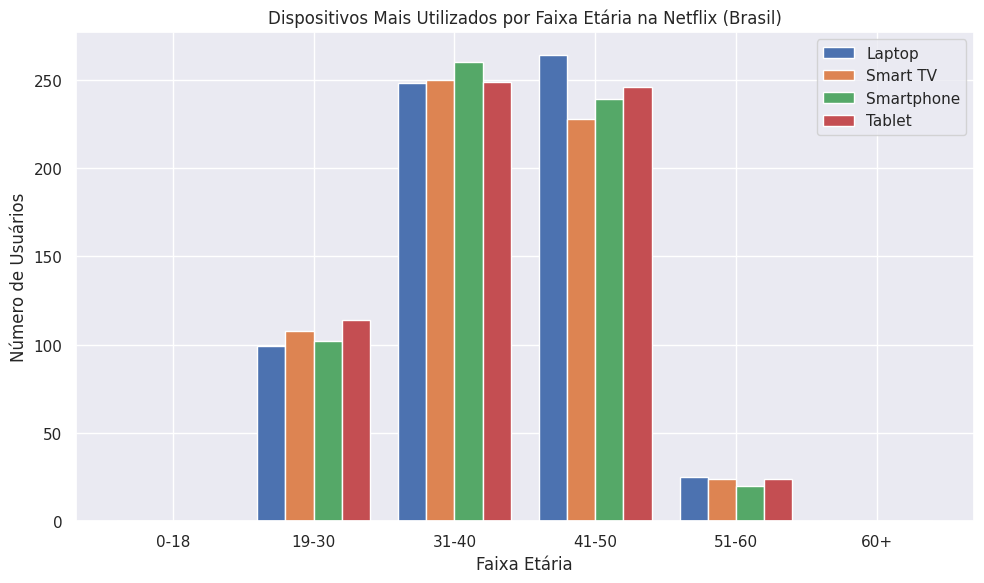

In [59]:
dispositivos_por_idade = df_netflix.groupby('Age Group')['Device'].value_counts().unstack()

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2

index = range(len(dispositivos_por_idade))

for i, dispositivo in enumerate(dispositivos_por_idade.columns):
    plt.bar([pos + i * bar_width for pos in index], dispositivos_por_idade[dispositivo], bar_width, label=dispositivo)

plt.title('Dispositivos Mais Utilizados por Faixa Etária na Netflix (Brasil)')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Usuários')
plt.xticks([pos + bar_width * (len(dispositivos_por_idade.columns) - 1) / 2 for pos in index], dispositivos_por_idade.index)
plt.legend()
plt.tight_layout()
plt.show()

In [56]:
print(df_netflix.columns)

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration', 'Age_Group', 'Age Group'],
      dtype='object')


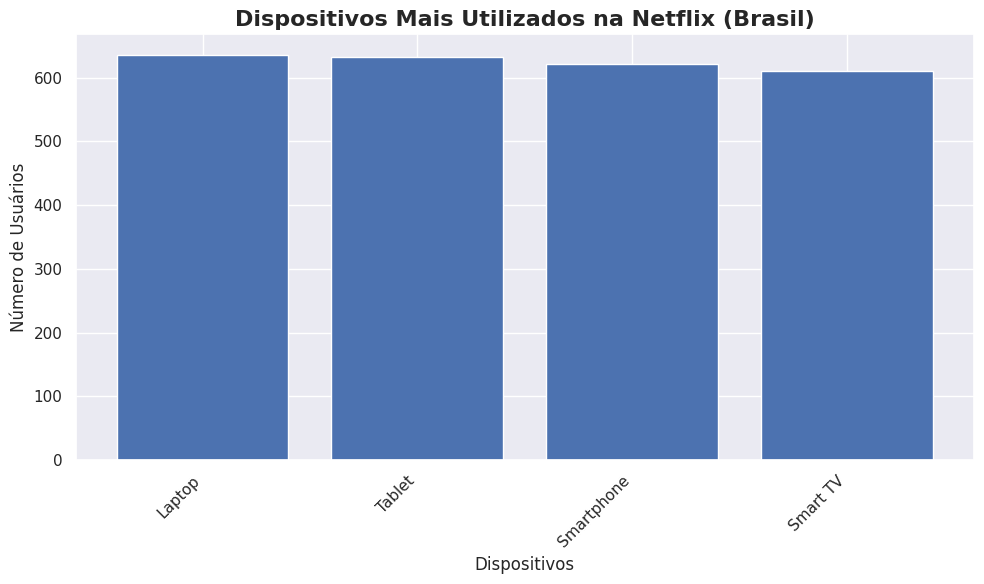

In [60]:
dispositivos = df_netflix['Device'].value_counts()

dispositivos_labels = dispositivos.index
dispositivos_values = dispositivos.values

plt.figure(figsize=(10, 6))
plt.bar(dispositivos_labels, dispositivos_values)
plt.title('Dispositivos Mais Utilizados na Netflix (Brasil)', fontsize=16, fontweight='bold')
plt.xlabel('Dispositivos')
plt.ylabel('Número de Usuários')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()